### Introduction

When it comes to practical business use cases, there is often a disconnect between clustering algorithms and interpretability. This is especially true as more features which can better define groups of customers, are added. Additionally, many of the existing visualizations used to describe clustering algorithms only take into account two features. An underutilized package and visualization that addresses these shortcomings is <b>Plotly's line-polar</b>! To demonstrate this, demographic and purchase data from 2,240 customers from <a href='https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis'>Kaggle</a> was used.


<b> Business Questions & Recommendations</b><br>
- How many segments of customers can we identiy so that we can better serve them?
- What are the characteristics that define these customer segments in terms that are comprehensible to non

<b> Answers & Strategic Recommendations</b><br><br>
By leveraging existing customer demographic and purchase data, we can identify two groups and their characteristics. This allows us to clearly convey to those outside of Analyst/Data Scientist teams what the Clustering Algorithms reveal, and provides a foundation on which future strategies to better serve these customers can be created.

Based on the Polar Chart, we can see the chracteristics that define the two groups:<br>
- <b>"The High Income Spenders"</b>
    - The group is defined as those who are the highest spenders, who purchase the largest numbers of items, and have the largest incomes.
    - Based on the Pie chart, we can see this group comprises 43.8% of customers<br><br>

- <b>"Early Adopters"</b>
    - This group is defined as being less across all 6 features that are used in the clustering algorithm.
    - Based on the Pie chart, we can see this group comprises 56.2% of customers

![Polar Chart](newplot.png)<br>
<br>
![Pie Chart](pie_chart.png)<br>

### Preparing the Environment

In [77]:
# Importing Libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px
from matplotlib.ticker import StrMethodFormatter
import tkinter
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
matplotlib.use('TkAgg')
%matplotlib inline

# For Reviewing Missing Data
import missingno

# # Many Rows & Columns, This Enables Us to See All in Output
# pd.set_option('display.max_row', None)
# pd.set_option('display.max_column', None)

# For Clustering
from sklearn.cluster import KMeans
from sklearn import metrics

# Different Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing CSV
df = pd.read_csv(r'C:/Users/nickb/Documents/Data Science/Projects/_Work In Progress/CustomerSegmentation/marketing_campaign.csv')

#### Basic Data Overview

In [78]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [80]:
# Checking for Duplicates
df.duplicated().sum()

0

#### Addressing Missing Values

In [81]:
# Finding Missing Values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False).head(20) # Remove Head to Show More
print(missing_value_df)

# Imputing the 1% of Missing Income values with the Mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

                             column_name  percent_missing
Income                            Income         1.071429
ID                                    ID         0.000000
NumDealsPurchases      NumDealsPurchases         0.000000
Z_Revenue                      Z_Revenue         0.000000
Z_CostContact              Z_CostContact         0.000000
Complain                        Complain         0.000000
AcceptedCmp2                AcceptedCmp2         0.000000
AcceptedCmp1                AcceptedCmp1         0.000000
AcceptedCmp5                AcceptedCmp5         0.000000
AcceptedCmp4                AcceptedCmp4         0.000000
AcceptedCmp3                AcceptedCmp3         0.000000
NumWebVisitsMonth      NumWebVisitsMonth         0.000000
NumStorePurchases      NumStorePurchases         0.000000
NumCatalogPurchases  NumCatalogPurchases         0.000000
NumWebPurchases          NumWebPurchases         0.000000
MntGoldProds                MntGoldProds         0.000000
Year_Birth    

#### Feature Engineering

In [82]:
# Converting Columns to Date-Time Format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Creating Colunms for a Customer's Age and the Number of Years and Days They've Been a Customer 
df['Age_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_A_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)

df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16') # Changing to int format

# Alone, Absurd, and Yolo Were Marital Status for only seven years, so they've been removed.
df = df[(df['Marital_Status'] != 'Alone') & (df['Marital_Status'] != 'Absurd') & (df['Marital_Status'] != 'YOLO')]

# Segmenting education levels in four groups
df["Education_Level"]=df["Education"].replace({"Basic":"Basic","2n Cycle":"Graduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}) # Appers 2n = Graduate level

# Total Count of purchases made
df['Total_NumberOfPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total amount spent on products
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


C:\Users\nickb\AppData\Local\Temp\ipykernel_32588\3946496629.py:3: UserWarning:

Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\nickb\AppData\Local\Temp\ipykernel_32588\3946496629.py:3: UserWarning:

Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\nickb\AppData\Local\Temp\ipykernel_32588\3946496629.py:3: UserWarning:

Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\nickb\AppData\Local\Temp\ipykernel_32588\3946496629.py:3: UserWarning:

Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\nickb\AppData\Local\Temp\ipykernel_32588\3946496629.py:3: UserWarning:

Parsing '15-11-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

#### Dropping Columns

In [83]:
# Not Needed for Analysis
df.drop("ID", axis = 1, inplace=True)

# Not Needed since we have Age now
df.drop("Year_Birth", axis = 1, inplace=True)

# Only Single Value in Both of These Columns, so dropping.
df.drop("Z_CostContact", axis = 1, inplace=True)
df.drop("Z_Revenue", axis = 1, inplace=True)

In [84]:
def histogram(tableName, columnName):
    ax = tableName.hist(column=columnName, bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel(columnName, labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

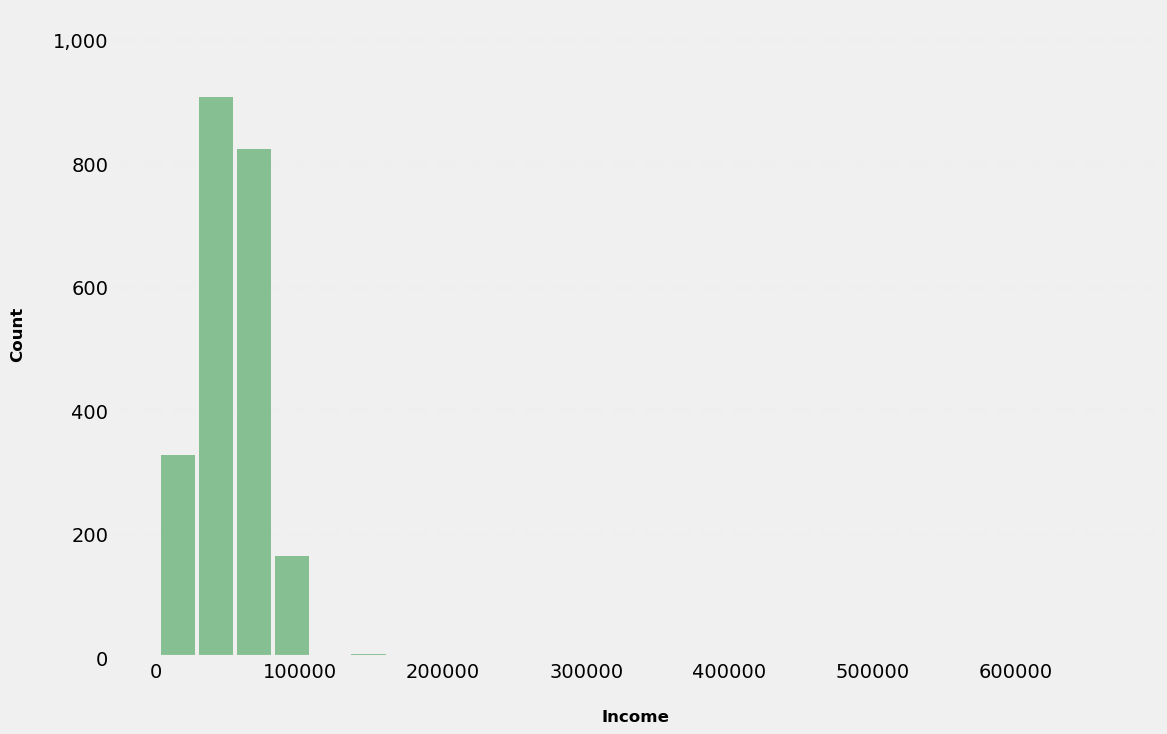

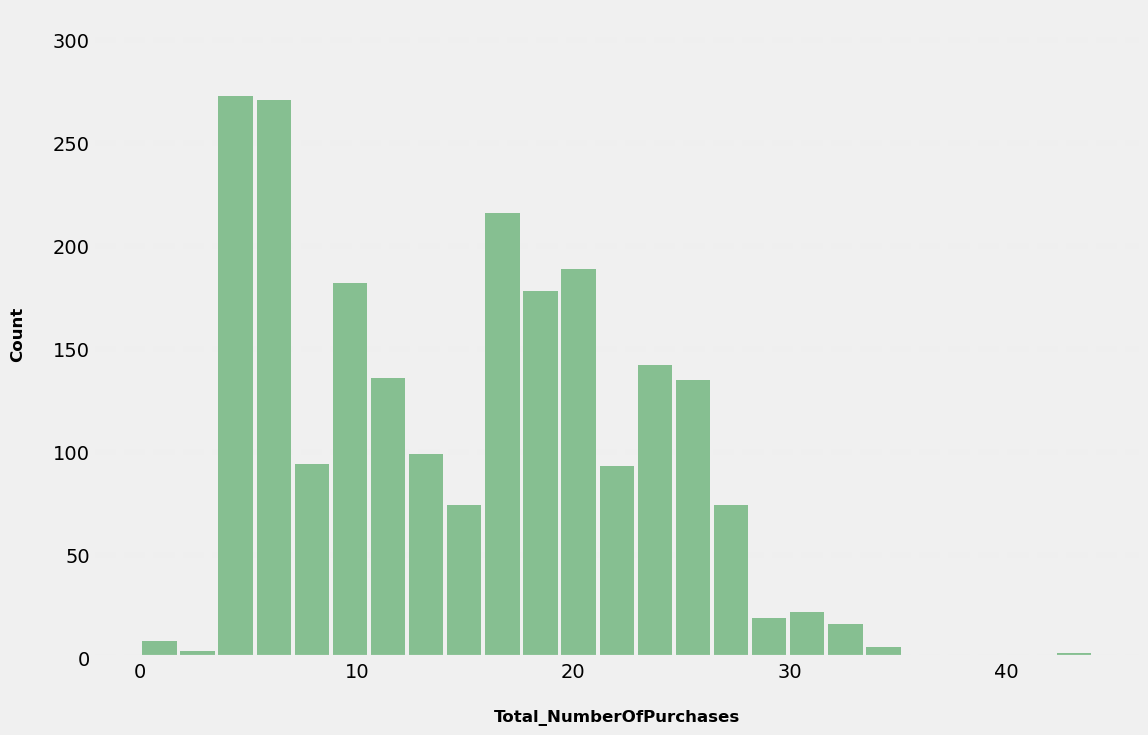

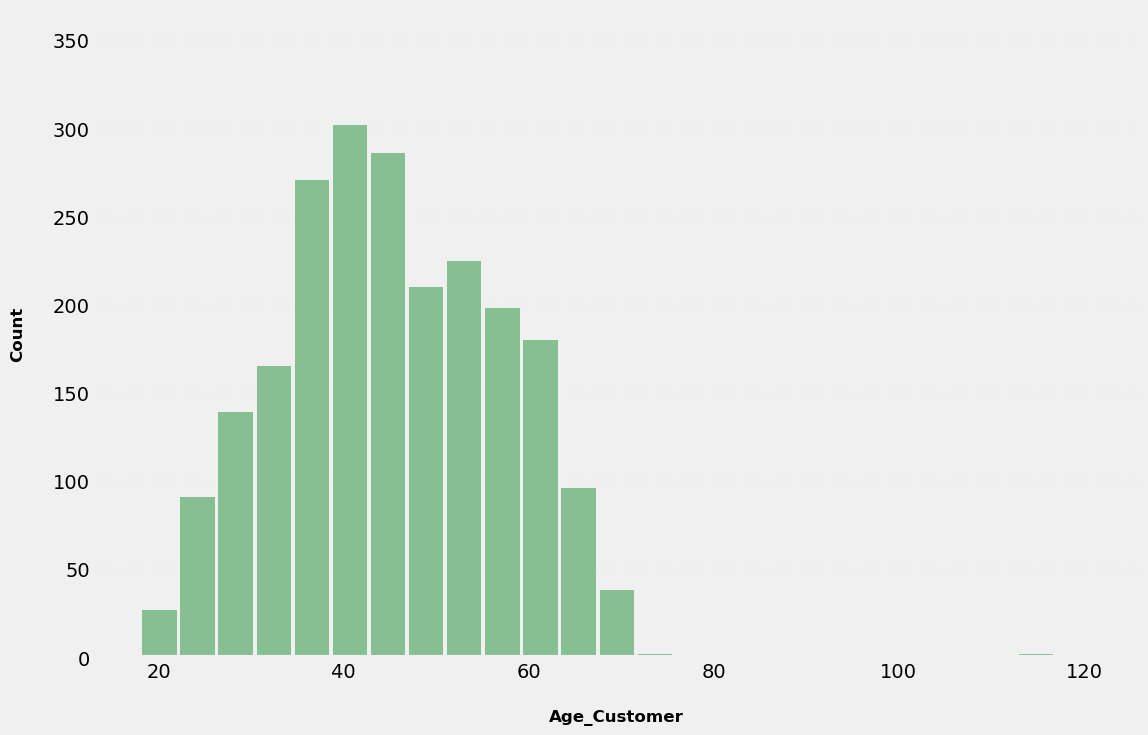

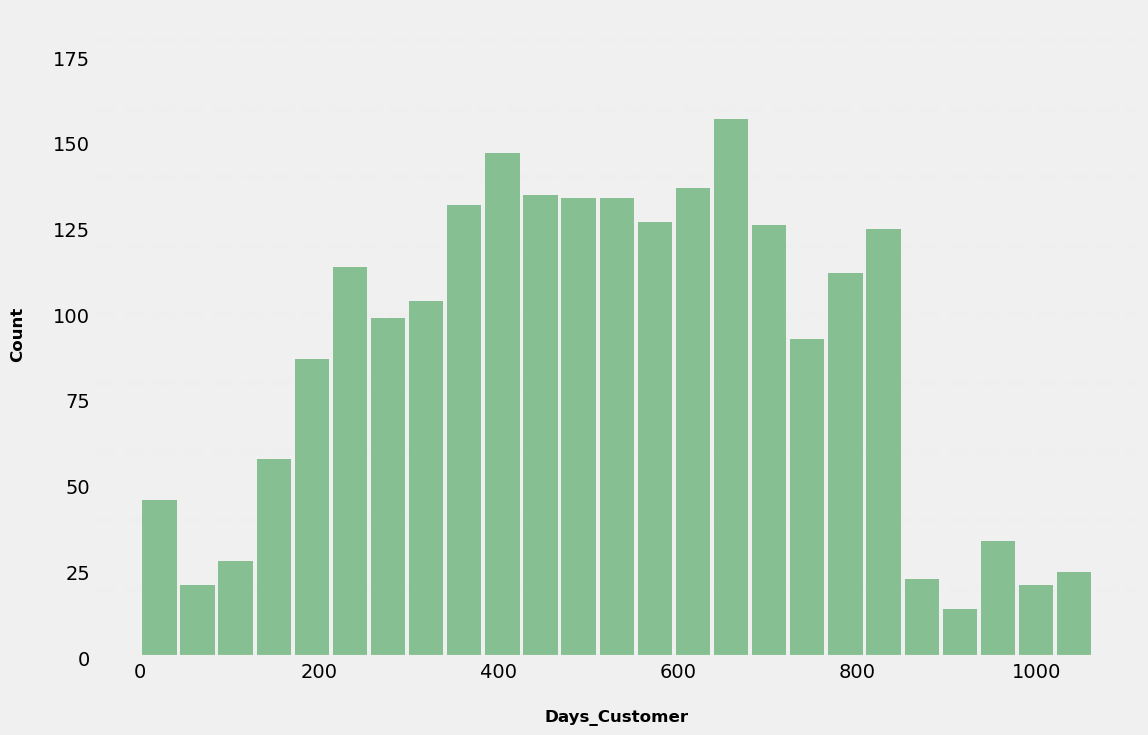

In [85]:
histogram(df,'Income')
histogram(df,'Total_NumberOfPurchases')
histogram(df,'Age_Customer')
histogram(df,'Days_Customer')

For the Age of our customers, we can see a relatively normal distribution with extreme outliers around 120. Since there's an almost 40 year difference and this might skew the data, these values are removed. There's also a customer with a very high income (over 600,000) who hasn't been purchasing much that we're going to remove from this model, but who is definitely a customer to make note of model aside!

In [86]:
df = df[df['Age_Customer'] < 100]

df = df[df['Income'] < 500000]

## Clustering

In [87]:
# We Are Going to Use the Following Columns for Clustering
df = df.loc[:, ['Income', 'Age_Customer','Days_Customer','Recency','Total_NumberOfPurchases','Total_Spent']]

df.head()

,Income,Age_Customer,Days_Customer,Recency,Total_NumberOfPurchases,Total_Spent
0,58138.0,57,971,58,25,1617
1,46344.0,60,125,38,6,27
2,71613.0,49,472,26,21,776
3,26646.0,30,65,26,8,53
4,58293.0,33,321,94,19,422


### Standardizing and Normalizing Data

In [88]:
import plotly.graph_objects as go

# Normalizing and Standardizing Data
X=df
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

### Assessing the Ideal Number of Clusters

#### 1. Using the Elbow Method

In [89]:

# Interiva vs. Cluster Visualization to Determine Ideal number of Clusters
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        
        # Annotation of Elbow Point
        # dict(
        #     x=3,
        #     y=inertia[2],
        #     xref="x",
        #     yref="y",
        #     text="Elbow!",
        #     showarrow=True,
        #     arrowhead=7,
        #     ax=20,
        #     ay=-40
        # )
    ])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



#### 2. Using the Silhouette Method

In most cases, the elbow method will reveal the ideal number of clusters. In this case however, it does not, so we'll implement the Silhouette Method.

For n_clusters = 2 The average silhouette_score is : 0.24999978854806454
For n_clusters = 3 The average silhouette_score is : 0.2274993758029887
For n_clusters = 4 The average silhouette_score is : 0.22646504625946237
For n_clusters = 5 The average silhouette_score is : 0.20303484122929616
For n_clusters = 6 The average silhouette_score is : 0.19055455570639387


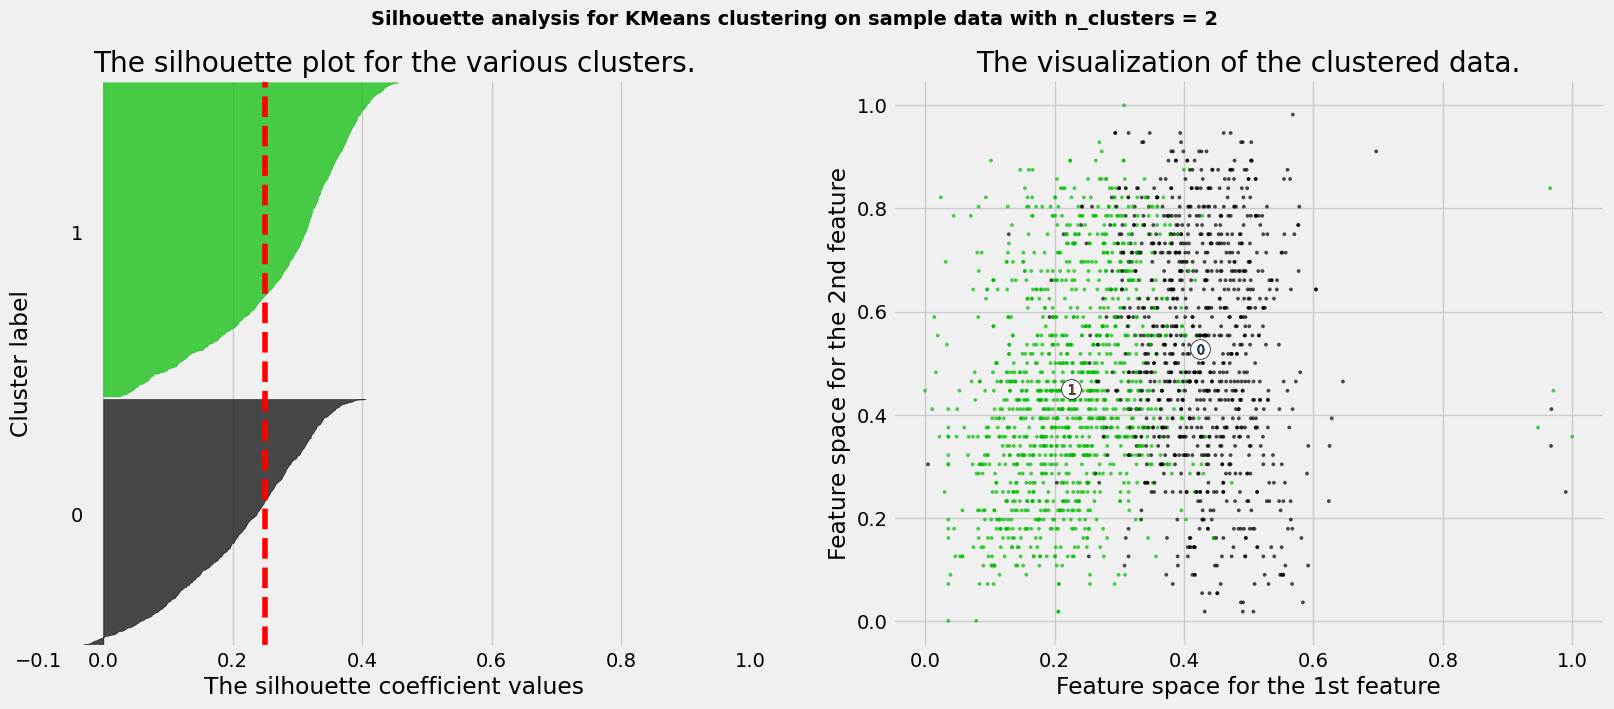

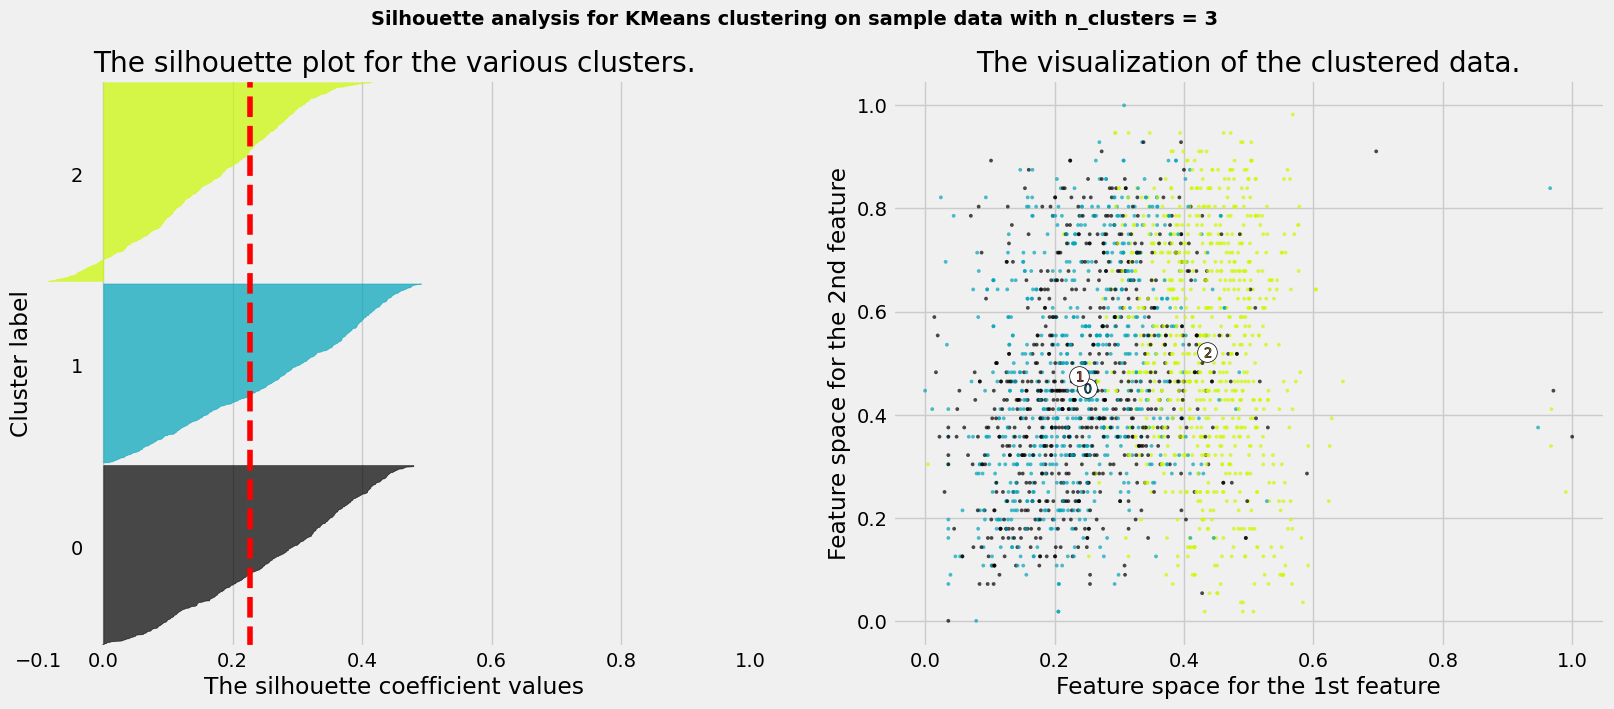

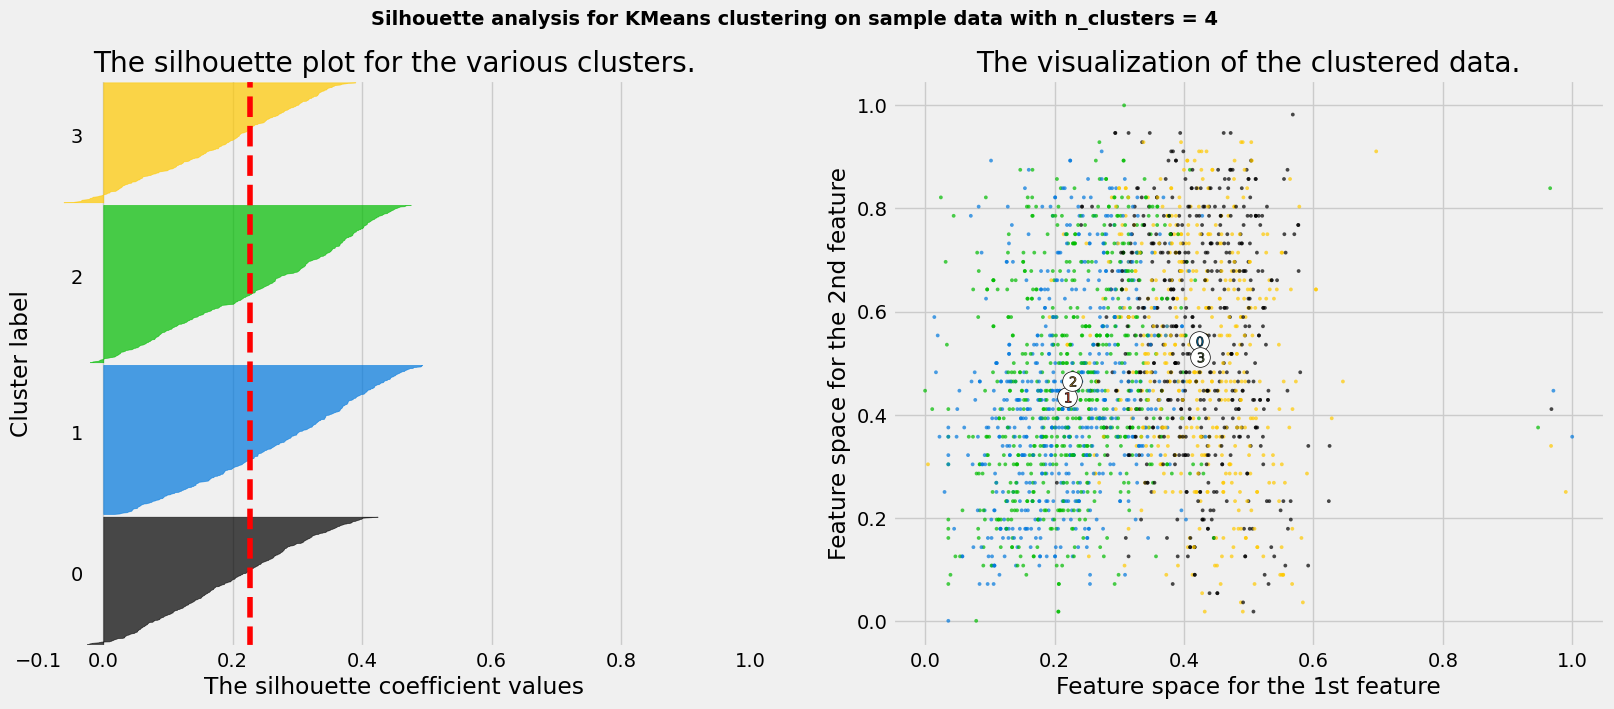

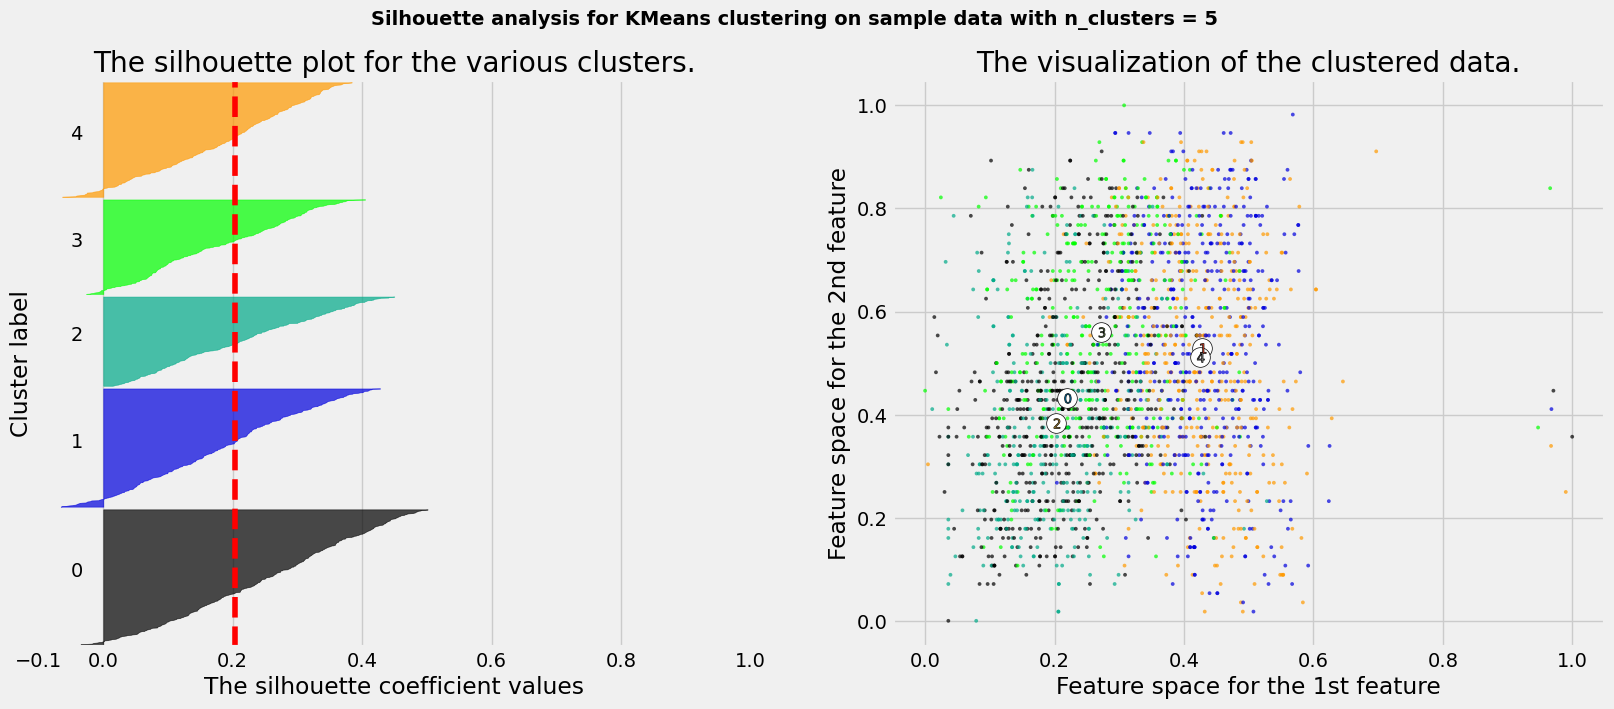

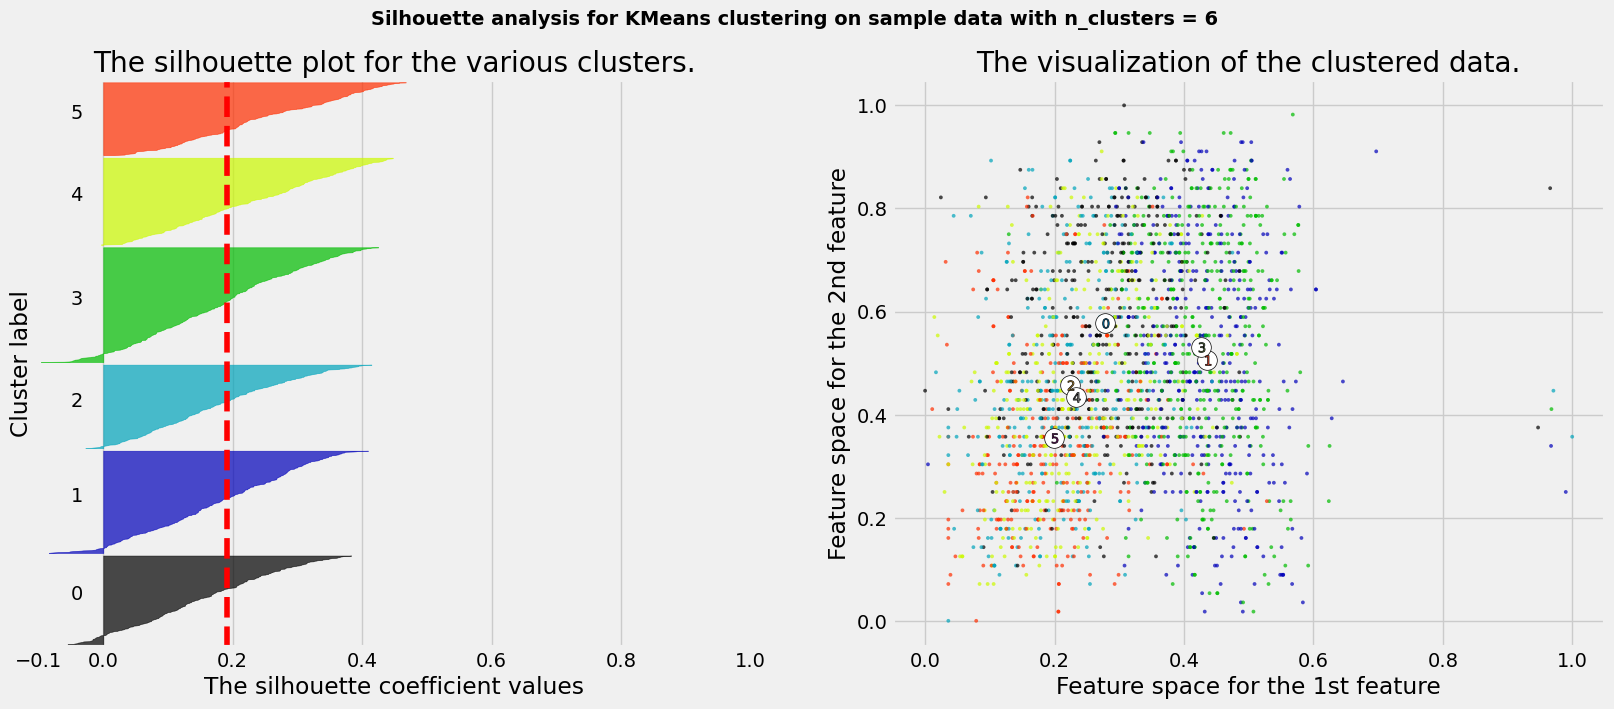

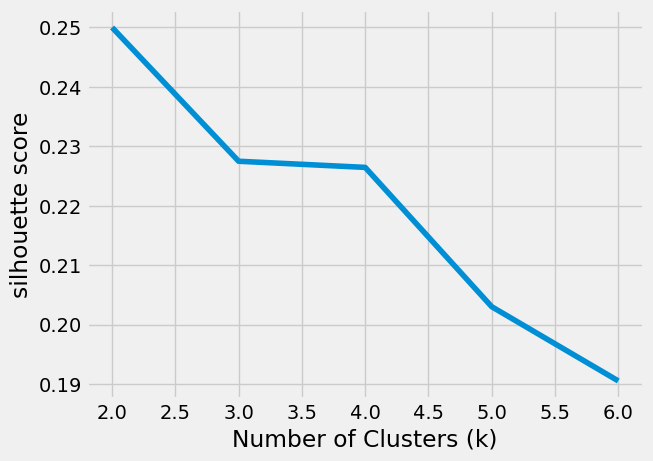

In [90]:
# Initial Code Used With Minor Changes: https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
# Implementation of the Silhouette Method (rather than Elbow Method) to ID the ideal # of Clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style


range_n_clusters = [2,3,4,5,6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### Implementation & Different Cluster Visualization Techniques

In [91]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
matplotlib.use('TkAgg')

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=df.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
# fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
# plt.show()

In [93]:
fig1 = px.scatter(df, x="Income", y="Age_Customer", color="Days_Customer",
                 size="Total_Spent")
fig1.update_layout(title="4 Features Representation")
fig1.show()

In [94]:
fig2 = px.scatter_3d(df, x="Income", y="Age_Customer", z='Total_NumberOfPurchases',color="Days_Customer",
                 size="Total_Spent")
fig2.update_layout(title="5 Features Representation")
fig2.show()

In [95]:
kmeans = KMeans(
        n_clusters=2, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=df.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [96]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red'])